In [1]:
# Listing the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make prediction in our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"
]

In [2]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make prediction in our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with Machine Learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [4]:
heart_disease = pd.read_csv("data/heart-disease.csv")

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [10]:
X.shape[0] * 0.8

242.4

In [11]:
242 + 61

303

In [12]:
len(heart_disease)

303

## 1.1 Make sure it's all numerical 

In [13]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [15]:
len(car_sales)

1000

In [16]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [17]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [18]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [19]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [20]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [21]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [22]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [23]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [25]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [28]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [29]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [30]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

### Option 1: Fill missing data with Pandas

In [31]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [32]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
# Remove rows with missing Price Value
car_sales_missing.dropna(inplace=True)

In [34]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
len(car_sales_missing)

950

In [36]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
# Let's try and convert our data to numbers
# Turn the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [38]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical value with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features =["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [43]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [44]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [45]:
# Let's try and convert our data to numbers
# Turn the categories to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [46]:
# Now we've got our data is filled (no missing) and as numbers(numerical data)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [47]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Chossing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn Machine Learning Map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [48]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [49]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
# How many samples?
len(boston_df)

506

In [51]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random_seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on the test data
model.score(X_test, y_test)

0.6662221670168523

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [52]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup Random  seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8654448653350507

In [53]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168523

### 2.2 Choosing and estimator for a classification problem

Let's go to the map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [54]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [56]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Initialize LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/home/thura/anaconda3/envs/data-science-ml-course/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [57]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [58]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [59]:
 # Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier 
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns that the model has learned)
clf.score(X_test, y_test)


0.8524590163934426

In [60]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [61]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`


In [62]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 3, 4]))   # This doesn't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [63]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [64]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [65]:
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]])

In [66]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [67]:
clf.score(X_test, y_test)

0.8524590163934426

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions wiht `predict_proba()`

In [69]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [70]:
# Let's predict() on the same data ...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [71]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [72]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models.

In [73]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()

# Fit the data to the model
model.fit(X_train, y_train)

# Make prediction 
y_preds = model.predict(X_test)

In [75]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [76]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [77]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

## Evaluating a macine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [78]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
 clf.score(X_train, y_train)

1.0

In [80]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)

In [82]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using tihe `scoring` parameter

In [83]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [86]:
cross_val_score(clf, X, y, cv=5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [87]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [88]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [90]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [91]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

cross_val_score = cross_val_score(clf, X, y, cv=5)

In [93]:
np.mean(cross_val_score)

0.811639344262295

In [94]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}")

Heart Disease Classifier Cross-Validated Accuracy: 81.16


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predict 1 when truth is 1
* False positive = model predict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [95]:
# Create X_test.... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [96]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make prediction with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.92, 0.08],
        [0.15, 0.85],
        [0.17, 0.83],
        [0.15, 0.85],
        [0.14, 0.86],
        [0.05, 0.95],
        [0.29, 0.71],
        [0.82, 0.18],
        [0.44, 0.56],
        [0.04, 0.96]]),
 61)

In [97]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.08, 0.85, 0.83, 0.85, 0.86, 0.95, 0.71, 0.18, 0.56, 0.96])

In [98]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.07692308, 0.11538462, 0.11538462,
       0.11538462, 0.15384615, 0.15384615, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.5       , 0.5       , 0.53846154,
       0.65384615, 0.73076923, 0.76923077, 0.80769231, 0.96153846,
       1.        ])

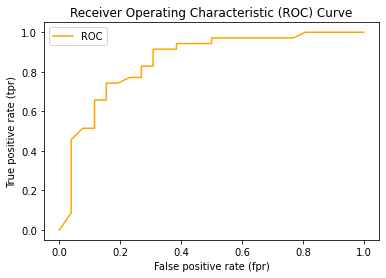

In [99]:
 # Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot the line with no predictive power (baseline)
    # plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8554945054945055

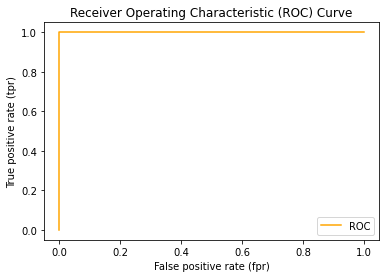

In [101]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [102]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[19,  7],
       [ 6, 29]])

In [104]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,19,7
1,6,29


In [105]:
28 + 1 + 2 + 30

61

In [106]:
len(y_preds)

61

In [107]:
# How install a conda package into the current environment from a Jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

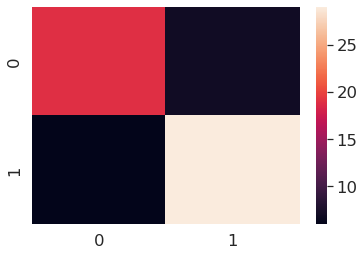

In [108]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

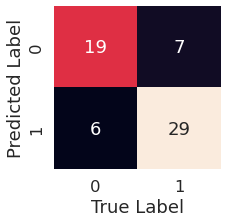

In [109]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(conf_mat)

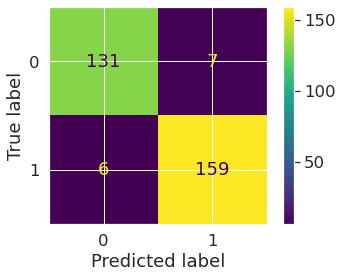

In [110]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

**Classification Report**
* Precision - Indicate the proportion of positive identication (model predicted class1) which were actually correct. A model which produce no false positives has a precision of 1.0
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produce no false negatives has a recall of 1.0
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for marco average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (eg. will give a high value when one class out performs another due to having more samples.

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
           1       0.81      0.83      0.82        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [112]:
# Where precision and recall between valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/home/thura/anaconda3/envs/data-science-ml-course/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced(eg. smae amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coeficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers of test value, it's R^2 value would be 1.

In [113]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [114]:
model.score(X_test, y_test)

0.8654448653350507

In [115]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [116]:
y_test.mean()

21.488235294117644

In [117]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds)

0.8654448653350507

In [118]:
model.score(X_test, y_test), r2_score(y_test, y_preds)

(0.8654448653350507, 0.8654448653350507)

In [119]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test, y_test_mean)

0.0

In [120]:
# Model predicting perfectly the correct values gets an R^2 score of 1
r2_score(y_test, y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute diferences between predictions and actual values. It give an idea of how wrong your model predictions are.

In [121]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [122]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error (MSE)**

In [123]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [124]:
# Calculate MSE step by step manually
squared = np.square(df["differences"])
squared.mean()

9.867437068627442

### 4.2.3 Finally using the `scoring` parameter

#### For classification model

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(37)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [126]:
np.random.seed(37)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.85245902, 0.8852459 , 0.80327869, 0.8       , 0.78333333])

In [127]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.49%


In [128]:
# Accuracy
np.random.seed(37)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.49%


In [129]:
# Precision
cv_precision = cross_val_score(clf, X, y, scoring="precision")
np.mean(cv_precision)

0.8223144910644911

In [130]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.8545454545454545

In [131]:
# F1 score
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.8433574879227054

#### How about for our regression model?

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(37)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [133]:
np.random.seed(37)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6254911380894734

In [134]:
np.random.seed(37)
cv_r2 = cross_val_score(model, X, y, scoring="r2")
cv_r2

array([0.77692366, 0.85947135, 0.72792909, 0.48903601, 0.27409559])

In [135]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.08457843, -2.57192079, -3.39708911, -3.81241584, -3.24330693])

In [136]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.365751341021152

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(37)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some prediction
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 83.61%
Precision: 0.875
Recall: 0.8235294117647058
F1: 0.8484848484848485


**Regression evaluation function**

In [138]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(37)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predicitions of our regression model
y_preds = model.predict(X_test)

print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.869360395764956
MAE: 2.709107843137255
MSE: 16.420871500000004


## 5. Improving a model

First predictions = baseline predictions        
First model = baseline model

From a data perspective:
* Could we collect more data? (generally the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [140]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test.

In [141]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [142]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds label on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    
    return metric_dict

In [143]:
# We used train_test_split before, but it just give train & test
# To tune, validation must include, therefore we create by ourselves

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))  # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))  # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation
baseline_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 82.22%
Precision: 0.81
recall: 0.88
f1: 0.85


In [144]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.84
recall: 0.84
f1: 0.84


In [145]:
np.random.seed(42)

clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)

y_preds = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds)

Accuracy: 80.00%
Precision: 0.81
recall: 0.84
f1: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [156]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=30, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.3s
[CV] n_estimators=1000, min_samples_split=4, min_s

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   1.8s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=2, m

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=30,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [157]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [158]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 83.61%
Precision: 0.78
recall: 0.89
f1: 0.83


### 5.3 Hyperparameter tuning with GridSearchCV

In [159]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [160]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [161]:
from sklearn.model_selection import GridSearchCV

grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Insantiate GridSearchCV
grid_clf = GridSearchCV(estimator=clf,
                        param_grid=grid_2,
                        cv=5,
                        verbose=2)

# Fit the GridSearchCV version of clf
grid_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   24.6s finished


In [162]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [169]:
grid_y_preds = grid_clf.predict(X_test)

# evaluate the predictions
grid_metrics = evaluate_preds(y_test, grid_y_preds)

Accuracy: 45.90%
Precision: 0.49
recall: 0.62
f1: 0.55


Let's compare our different models metrics.

In [170]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": grid_metrics})

compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.82,0.84,0.46
precision,0.81,0.84,0.78,0.49
recall,0.88,0.84,0.89,0.62
f1,0.85,0.84,0.83,0.55


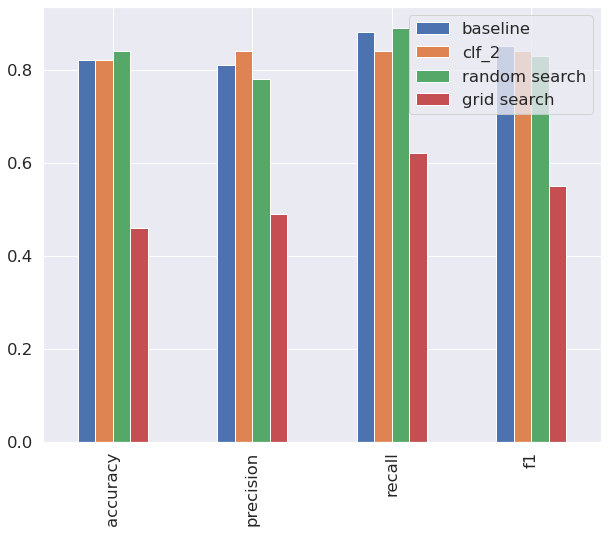

In [171]:
compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning model

Two ways to save and load machine learning models:

1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [172]:
import pickle

# Save an existing model to file
pickle.dump(grid_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [173]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [174]:
# Make prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)

# Evaluate
pickle_gs_metrics = evaluate_preds(y_test, pickle_y_preds)

Accuracy: 45.90%
Precision: 0.49
recall: 0.62
f1: 0.55


**Joblib**

In [177]:
from joblib import dump, load

# Save model to file
dump(grid_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [178]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [179]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 45.90%
Precision: 0.49
recall: 0.62
f1: 0.55


{'accuracy': 0.46, 'precision': 0.49, 'recall': 0.62, 'f1': 0.55}